In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import nan
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('covid.csv', parse_dates = True, low_memory = False, index_col = 'date')

In [3]:
data.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,1.0,1.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2020-02-25,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2020-02-26,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2020-02-27,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2020-02-28,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [4]:
data.isna().sum()

iso_code                                     0
continent                                 3607
location                                     0
total_cases                               1046
new_cases                                 1048
new_cases_smoothed                        2049
total_deaths                             10169
new_deaths                               10011
new_deaths_smoothed                       2049
total_cases_per_million                   1438
new_cases_per_million                     1440
new_cases_smoothed_per_million            2436
total_deaths_per_million                 10548
new_deaths_per_million                   10390
new_deaths_smoothed_per_million           2436
reproduction_rate                        14408
icu_patients                             65136
icu_patients_per_million                 65136
hosp_patients                            63590
hosp_patients_per_million                63590
weekly_icu_admissions                    72130
weekly_icu_ad

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72775 entries, 2020-02-24 to 2021-03-04
Data columns (total 58 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               72775 non-null  object 
 1   continent                              69168 non-null  object 
 2   location                               72775 non-null  object 
 3   total_cases                            71729 non-null  float64
 4   new_cases                              71727 non-null  float64
 5   new_cases_smoothed                     70726 non-null  float64
 6   total_deaths                           62606 non-null  float64
 7   new_deaths                             62764 non-null  float64
 8   new_deaths_smoothed                    70726 non-null  float64
 9   total_cases_per_million                71337 non-null  float64
 10  new_cases_per_million                  71335 non-null

In [6]:
data = data[data["location"] == "United States"]

In [7]:
data.drop(['iso_code', 'continent', 'location'], inplace = True, axis = 1)

In [8]:
data.isna().sum()

total_cases                                0
new_cases                                  1
new_cases_smoothed                         6
total_deaths                              38
new_deaths                                38
new_deaths_smoothed                        6
total_cases_per_million                    0
new_cases_per_million                      1
new_cases_smoothed_per_million             6
total_deaths_per_million                  38
new_deaths_per_million                    38
new_deaths_smoothed_per_million            6
reproduction_rate                         45
icu_patients                             180
icu_patients_per_million                 180
hosp_patients                            180
hosp_patients_per_million                180
weekly_icu_admissions                    408
weekly_icu_admissions_per_million        408
weekly_hosp_admissions                   375
weekly_hosp_admissions_per_million       375
new_tests                                 45
total_test

In [9]:
pd.pandas.set_option('display.max_columns', None)

In [10]:
data.drop(['tests_units'], inplace = True, axis = 1)

In [11]:
np.isnan(data).sum()

total_cases                                0
new_cases                                  1
new_cases_smoothed                         6
total_deaths                              38
new_deaths                                38
new_deaths_smoothed                        6
total_cases_per_million                    0
new_cases_per_million                      1
new_cases_smoothed_per_million             6
total_deaths_per_million                  38
new_deaths_per_million                    38
new_deaths_smoothed_per_million            6
reproduction_rate                         45
icu_patients                             180
icu_patients_per_million                 180
hosp_patients                            180
hosp_patients_per_million                180
weekly_icu_admissions                    408
weekly_icu_admissions_per_million        408
weekly_hosp_admissions                   375
weekly_hosp_admissions_per_million       375
new_tests                                 45
total_test

In [12]:
data.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.006,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,0.015,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926


In [13]:
def fill_missing(data):
    for row in range(data.shape[0]):
        for col in range(data.shape[1]):
            if np.isnan(data[row, col]):
                if row < 2:
                    data[row, col] = 0
                else:
                    if np.isnan(data[row - 1, col]):
                        data[row, col] = 0
                    else:
                        data[row, col] = data[row - 1, col]
                

In [14]:
fill_missing(data.values)

In [15]:
data

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,1.0,0.0,0.000,0.0,0.0,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.00,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.00,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.926
2020-01-23,1.0,0.0,0.000,0.0,0.0,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.00,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.00,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.926
2020-01-24,2.0,1.0,0.000,0.0,0.0,0.000,0.006,0.003,0.000,0.000,0.000,0.000,0.00,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.00,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.926
2020-01-25,2.0,0.0,0.000,0.0,0.0,0.000,0.006,0.000,0.000,0.000,0.000,0.000,0.00,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.00,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.926
2020-01-26,5.0,3.0,0.000,0.0,0.0,0.000,0.015,0.009,0.000,0.000,0.000,0.000,0.00,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.00,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-28,28578548.0,51204.0,67314.000,512545.0,1037.0,1943.857,86339.334,154.694,203.364,1548.462,3.133,5.873,0.85,12156.0,36.725,46945.0,141.827,0.0,0.0,37439.0,113.108,456669.0,332692519.0,1005.105,1.38,913020.0,2.758,0.074,13.5,75236003.0,49772180.0,24779920.0,2429823.0,1735053.0,22.50,14.88,7.41,5188.0,68.06,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.926
2021-03-01,28637313.0,58765.0,67752.429,514061.0,1516.0,1978.857,86516.870,177.536,204.688,1553.042,4.580,5.978,0.84,12156.0,36.725,46945.0,141.827,0.0,0.0,37439.0,113.108,456669.0,332692519.0,1005.105,1.38,913020.0,2.758,0.074,13.5,76899987.0,50732997.0,25466405.0,1663984.0,1817502.0,22.99,15.17,7.61,5434.0,68.06,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.926
2021-03-02,28694071.0,56758.0,65630.714,515985.0,1924.0,1932.000,86688.343,171.473,198.279,1558.855,5.813,5.837,0.84,12156.0,36.725,46945.0,141.827,0.0,0.0,37439.0,113.108,456669.0,332692519.0,1005.105,1.38,913020.0,2.758,0.074,13.5,78631601.0,51755447.0,26162122.0,1731614.0,1942788.0,23.51,1

In [16]:
data.isna().sum()

total_cases                              0
new_cases                                0
new_cases_smoothed                       0
total_deaths                             0
new_deaths                               0
new_deaths_smoothed                      0
total_cases_per_million                  0
new_cases_per_million                    0
new_cases_smoothed_per_million           0
total_deaths_per_million                 0
new_deaths_per_million                   0
new_deaths_smoothed_per_million          0
reproduction_rate                        0
icu_patients                             0
icu_patients_per_million                 0
hosp_patients                            0
hosp_patients_per_million                0
weekly_icu_admissions                    0
weekly_icu_admissions_per_million        0
weekly_hosp_admissions                   0
weekly_hosp_admissions_per_million       0
new_tests                                0
total_tests                              0
total_tests

In [17]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,4.080000e+02,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.0,408.0,408.000000,408.000000,4.080000e+02,4.080000e+02,408.000000,408.000000,4.080000e+02,408.000000,408.000000,408.000000,4.080000e+02,4.080000e+02,4.080000e+02,4.080000e+02,4.080000e+02,408.000000,408.000000,408.000000,408.000000,408.000000,408.0,408.000,4.080000e+02,4.080000e+02,4.080000e+02,408.000,4.080000e+02,4.080000e+02,4.080000e+02,4.080000e+02,4.080000e+02,408.0,408.00,408.00,408.000
mean,8.193983e+06,70654.762255,70198.730042,183727.757353,1275.382353,1261.531150,24755.037387,213.456787,212.079034,555.064306,3.853078,3.811240,1.062377,9275.465686,28.022336,36788.848039,111.143667,0.0,0.0,32970.517157,99.608000,8.221386e+05,1.075890e+08,325.039733,2.483784,8.224559e+05,2.484745,0.073755,12.889461,5.498459e+06,4.079677e+06,1.367711e+06,2.012913e+05,1.876995e+05,1.644020,1.219975,0.408873,561.232843,61.190833,331002647.0,35.608,3.830000e+01,1.541300e+01,9.732000e+00,54225.446,1.200000e+00,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,0.0,2.77,78.86,0.926
std,8.917763e+06,69671.284132,68569.883589,146003.172729,1043.187777,946.593237,26941.666644,210.485587,207.158115,441.093674,3.151614,2.859773,0.660079,9613.719658,29.044238,40922.859506,123.633019,0.0,0.0,37525.132336,113.368064,6.124985e+05,1.078299e+08,325.767484,1.850437,5.780865e+05,1.746475,0.044872,7.032299,1.591272e+07,1.124352e+07,4.652460e+06,5.283120e+05,4.658214e+05,4.757831,3.362075,1.390939,1392.832372,21.062367,0.0,0.000,1.422830e-14,1.778538e-15,1.778538e-15,0.000,2.223172e-16,2.845660e-14,3.557076e-15,7.114151e-15,3.557076e-15,0.0,0.00,0.00,0.000
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.003000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,331002647.0,35.608,3.830000e+01,1.541300e+01,9.732000e+00,54225.446,1.200000e+00,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,0.0,2.77,78.86,0.926
25%,1.161518e+06,24140.500000,22808.035750,70745.250000,518.250000,712.928500,3509.089000,72.931250,68.906000,213.730500,1.565750,2.154000,0.900000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2.857992e+05,7.891515e+06,23.841000,0.863500,2.723332e+05,0.823000,0.046000,7.975000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,64.585000,331002647.0,35.608,3.830000e+01,1.541300e+01,9.732000e+00,54225.446,1.200000e+00,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,0.0,2.77,78.86,0.926
50%,5.223052e+06,45632.500000,43

In [18]:
data.shape

(408, 54)

In [19]:
data.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0,0.003,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.926
2020-01-23,1.0,0.0,0.0,0.0,0.0,0.0,0.003,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.926
2020-01-24,2.0,1.0,0.0,0.0,0.0,0.0,0.006,0.003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.926
2020-01-25,2.0,0.0,0.0,0.0,0.0,0.0,0.006,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.926
2020-01-26,5.0,3.0,0.0,0.0,0.0,0.0,0.015,0.009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.926


In [20]:
def plot(data):
    fig, ax = plt.subplots(figsize=(18,18))

    for i in range(len(data.columns)):
        plt.subplot(len(data.columns), 1, i+1)
        name = data.columns[i]
        plt.plot(data[name])
        plt.title(name , y=0)
        plt.yticks([])
    plt.show()
    fig.tight_layout()

In [21]:
data.drop(['population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index'], inplace = True, axis = 1)

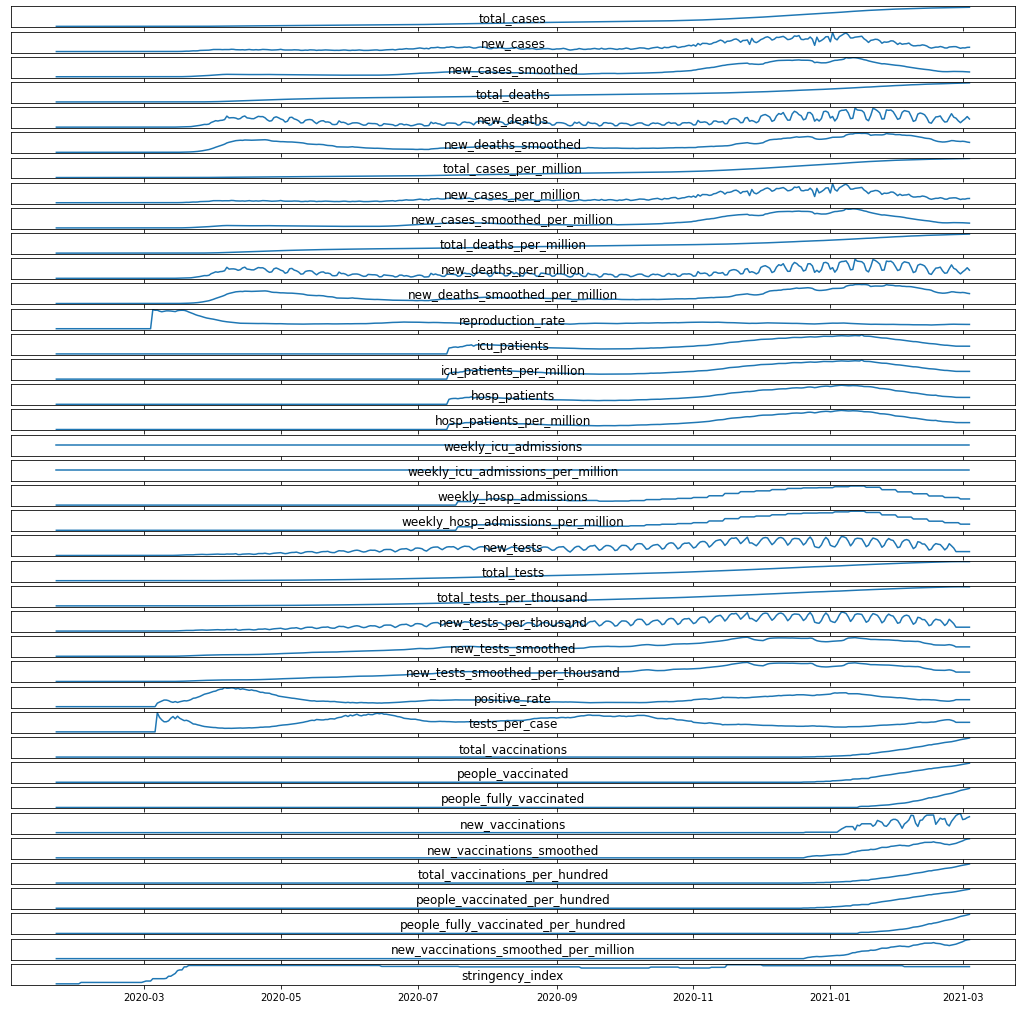

In [22]:
plot(data)

In [23]:
clean_data = data[['new_cases_smoothed', 'new_deaths_smoothed', 'weekly_hosp_admissions_per_million', 'new_tests_smoothed', 'positive_rate', 'new_vaccinations_smoothed']].copy()

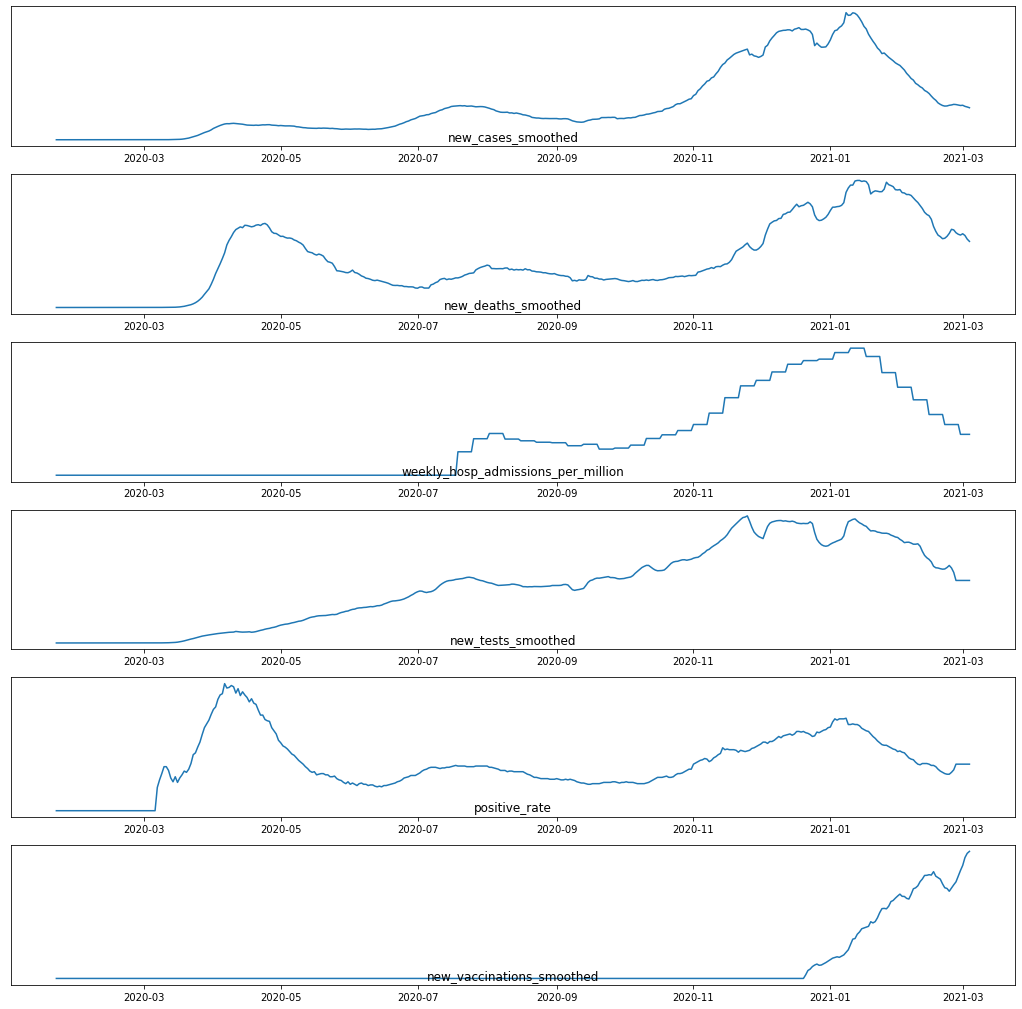

In [24]:
plot(clean_data)

In [25]:
data['2021']

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-01,20215297.0,153394.0,196269.000,353694.0,2137.0,2603.286,61072.916,463.422,592.953,1068.553,6.456,7.865,1.06,27426.0,82.857,120809.0,364.979,0.0,0.0,106333.0,321.245,1207212.0,253201408.0,764.953,3.647,1442869.0,4.359,0.133,7.5,2794588.0,2794588.0,0.0,57909.0,302329.0,0.84,0.84,0.00,904.0,71.76
2021-01-02,20515083.0,299786.0,206787.000,356187.0,2493.0,2691.571,61978.607,905.691,624.729,1076.085,7.532,8.132,1.09,27583.0,83.332,122539.0,370.205,0.0,0.0,106333.0,321.245,1080002.0,254281410.0,768.216,3.263,1460612.0,4.413,0.141,7.1,4225756.0,4225756.0,0.0,57909.0,325882.0,1.26,1.26,0.00,974.0,71.76
2021-01-03,20723157.0,208074.0,214323.714,357621.0,1434.0,2693.143,62607.224,628.617,647.498,1080.417,4.332,8.136,1.08,28022.0,84.658,125480.0,379.091,0.0,0.0,112335.0,339.378,1009952.0,255291362.0,771.267,3.051,1473874.0,4.453,0.146,6.8,4225756.0,4225756.0,0.0,57909.0,336949.0,1.26,1.26,0.00,1007.0,71.76
2021-01-04,20906563.0,183406.0,215682.286,359708.0,2087.0,2706.571,63161.317,554.092,651.603,1086.722,6.305,8.177,1.08,28286.0,85.456,127356.0,384.758,0.0,0.0,112335.0,339.378,1341897.0,256633259.0,775.321,4.054,1489243.0,4.499,0.144,6.9,4563260.0,4563260.0,0.0,57909.0,348017.0,1.36,1.36,0.00,1041.0,71.76
2021-01-05,21140217.0,233654.0,220694.714,363387.0,3679.0,2714.143,63867.214,705.898,666.746,1097.837,11.115,8.200,1.09,28543.0,86.232,128776.0,389.048,0.0,0.0,112335.0,339.378,1879638.0,258512897.0,780.999,5.679,1501839.0,4.537,0.146,6.8,4836469.0,4836469.0,0.0,273209.0,339372.0,1.45,1.45,0.00,1015.0,71.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-28,28578548.0,51204.0,67314.000,512545.0,1037.0,1943.857,86339.334,154.694,203.364,1548.462,3.133,5.873,0.85,12156.0,36.725,46945.0,141.827,0.0,0.0,37439.0,113.108,456669.0,332692519.0,1005.105,1.380,913020.0,2.758,0.074,13.5,75236003.0,49772180.0,24779920.0,2429823.0,1735053.0,22.50,14.88,7.41,5188.0,68.06
2021-03-01,28637313.0,58765.0,67752.429,514061.0,1516.0,1978.857,86516.870,177.536,204.688,1553.042,4.580,5.978,0.84,12156.0,36.725,46945.0,141.827,0.0,0.0,37439.0,113.108,456669.0,332692519.0,1005.105,1.380,913020.0,2.758,0.074,13.5,76899987.0,50732997.0,25466405.0,1663984.0,1817502.0,22.99,15.17,7.61,5434.0,68.06
2021-03-02,28694071.0,56758.0,65630.714,515985.0,1924.0,1932.000,86688.343,171.473,198.279,1558.855,5.813,5.837,0.84,12156.0,36.725,46945.0,141.827,0.0,0.0,37439.0,113.108,456669.0,332692519.0,1005.105,1.380,913020.0,2.758,0.074,13.5,78631601.0,51755447.0,26162122.0,1731614.0,1942788.0,23.51,15.48,7.82,5809.0,68.06


In [26]:
data_train = data['2020']['new_cases']
data_train

date
2020-01-22         0.0
2020-01-23         0.0
2020-01-24         1.0
2020-01-25         0.0
2020-01-26         3.0
                ...   
2020-12-27    155317.0
2020-12-28    173896.0
2020-12-29    198567.0
2020-12-30    232416.0
2020-12-31    234133.0
Name: new_cases, Length: 345, dtype: float64

In [27]:
data_test = data['2021']['new_cases']
data_test

date
2021-01-01    153394.0
2021-01-02    299786.0
2021-01-03    208074.0
2021-01-04    183406.0
2021-01-05    233654.0
                ...   
2021-02-28     51204.0
2021-03-01     58765.0
2021-03-02     56758.0
2021-03-03     65909.0
2021-03-04     67164.0
Name: new_cases, Length: 63, dtype: float64

In [28]:
data_train = np.array(data_train)

In [29]:
X_train, y_train = [], []
for i in range(1, len(data_train)-1):
    X_train.append(data_train[i-1:i])
    y_train.append(data_train[i:i+1])

In [30]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [31]:
X_train.shape, y_train.shape

((343, 1), (343, 1))

In [32]:
pd.DataFrame(X_train)

,0
0,0.0
1,0.0
2,1.0
3,0.0
4,3.0
...,...
338,97498.0
339,226160.0
340,155317.0
341,173896.0


In [33]:
x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)

In [34]:
y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)

In [35]:
pd.DataFrame(y_train).head()

,0
0,0.000000
1,0.000004
2,0.000000
3,0.000012
4,0.000000


In [36]:
X_train.shape

(343, 1)

In [37]:
X_train = X_train.reshape(343, 1, 1)

In [38]:
X_train.shape

(343, 1, 1)

In [39]:
reg = Sequential()

In [40]:
reg.add(LSTM(units = 200, activation = 'relu', input_shape=(1,1)))
reg.add(Dense(1))

In [41]:
reg.compile(loss='mse', optimizer='adam')

In [42]:
reg.fit(X_train, y_train, epochs = 1000)

Epoch 1/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1029
Epoch 2/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0821
Epoch 3/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0657
Epoch 4/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0519
Epoch 5/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0419
Epoch 6/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0357
Epoch 7/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0314
Epoch 8/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0291
Epoch 9/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0264
Epoch 10/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0239
Epoch 11/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0209
Epoch 12/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0182
Epoch 13/1000
11/11 [====

11/11 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 102/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0039
Epoch 103/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 104/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 105/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 106/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 107/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 108/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 109/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 110/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 111/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 112/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0039
Epoch 113/1000
11/1

11/11 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 200/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 201/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 202/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 203/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 204/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 205/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 206/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 207/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 208/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 209/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 210/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 211/1000
11/1

11/11 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 298/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 299/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 300/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 301/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 302/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 303/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 304/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 305/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 306/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 307/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 308/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 309/1000
11/1

11/11 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 396/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 397/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 398/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 399/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 400/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 401/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 402/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 403/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 404/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 405/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 406/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 407/1000
11/1

11/11 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 494/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 495/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 496/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 497/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 498/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 499/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 500/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 501/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 502/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 503/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 504/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 505/1000
11/1

11/11 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 592/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 593/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 594/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 595/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 596/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0034
Epoch 597/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 598/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 599/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 600/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 601/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 602/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 603/1000
11/1

11/11 [==============================] - 0s 7ms/step - loss: 0.0033
Epoch 690/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 691/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0034
Epoch 692/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.0033
Epoch 693/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 694/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 695/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0034
Epoch 696/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 697/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 698/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 699/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 700/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 701/1000
11/1

11/11 [==============================] - 0s 10ms/step - loss: 0.0033
Epoch 788/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 789/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 790/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 791/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 792/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 793/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 794/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 795/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 796/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 797/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 798/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 799/1000
11/

11/11 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 886/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 887/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0034
Epoch 888/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 889/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 890/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0034
Epoch 891/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0033
Epoch 892/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0034
Epoch 893/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0034
Epoch 894/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 895/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 896/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0034
Epoch 897/1000
11/1

11/11 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 984/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 985/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 986/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 987/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 988/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.0034
Epoch 989/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 990/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 991/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 992/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 993/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 994/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 995/1000
11/1

### Prepare Testing Dataset

In [43]:
data_test = np.array(data_test)

In [44]:
X_test, y_test = [], []
for i in range(1, len(data_test)-1):
    X_test.append(data_test[i-1:i])
    y_test.append(data_test[i:i+1])

In [45]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [46]:
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

In [47]:
X_test.shape

(61, 1)

In [49]:
X_test = X_test.reshape(61,1,1)

In [50]:
y_pred = reg.predict(X_test)

In [51]:
y_pred = y_scaler.inverse_transform(y_pred)

In [52]:
y_pred

array([[162094.5  ],
       [247242.17 ],
       [200613.78 ],
       [184303.06 ],
       [215773.89 ],
       [226614.8  ],
       [237667.77 ],
       [244148.55 ],
       [230761.73 ],
       [203767.92 ],
       [204396.83 ],
       [211418.84 ],
       [213575.94 ],
       [216468.9  ],
       [219780.28 ],
       [196115.22 ],
       [179862.94 ],
       [153841.06 ],
       [178823.53 ],
       [183681.06 ],
       [190779.33 ],
       [188825.86 ],
       [174933.53 ],
       [143583.69 ],
       [160256.03 ],
       [156748.31 ],
       [161475.12 ],
       [173701.89 ],
       [171804.61 ],
       [153025.45 ],
       [126800.36 ],
       [146561.14 ],
       [129486.72 ],
       [135210.58 ],
       [137021.48 ],
       [145877.36 ],
       [116889.88 ],
       [ 98765.62 ],
       [ 99159.73 ],
       [105883.52 ],
       [105372.1  ],
       [118776.375],
       [111299.   ],
       [ 95399.04 ],
       [ 66537.52 ],
       [ 54334.793],
       [ 63325.72 ],
       [ 7294

In [53]:
y_true = y_scaler.inverse_transform(y_test)
y_true

array([[299786.],
       [208074.],
       [183406.],
       [233654.],
       [253993.],
       [277068.],
       [292105.],
       [262337.],
       [213161.],
       [214189.],
       [225999.],
       [229757.],
       [234901.],
       [240944.],
       [201008.],
       [177109.],
       [143085.],
       [175658.],
       [182514.],
       [192895.],
       [189993.],
       [170302.],
       [130811.],
       [151062.],
       [146670.],
       [152606.],
       [168630.],
       [166076.],
       [142088.],
       [111857.],
       [134316.],
       [114804.],
       [121191.],
       [123243.],
       [133507.],
       [103890.],
       [ 89600.],
       [ 89907.],
       [ 95170.],
       [ 94768.],
       [105398.],
       [ 99444.],
       [ 86984.],
       [ 64956.],
       [ 53977.],
       [ 62470.],
       [ 69829.],
       [ 69267.],
       [ 79295.],
       [ 71407.],
       [ 56892.],
       [ 55696.],
       [ 71610.],
       [ 74429.],
       [ 77407.],
       [ 7

In [54]:
def evaluate_model(y_true, y_pred):
    scores=[]
    for i in range(y_true.shape[1]):
        mse = mean_squared_error(y_true[:, i], y_pred[:, i])
        rmse = np.sqrt(mse)
        scores.append(rmse)
    total_score = 0
    for row in range(y_true.shape[0]):
        for col in range(y_pred.shape[1]):
            total_score = total_score + (y_true[row][col] - y_pred[row][col])**2
    total_score = np.sqrt(total_score/(y_true.shape[0]*y_pred.shape[1]))
    

    return total_score, scores
    

In [55]:
evaluate_model(y_true, y_pred)

(28163.974647280214, [28163.974647280214])

# Visualization

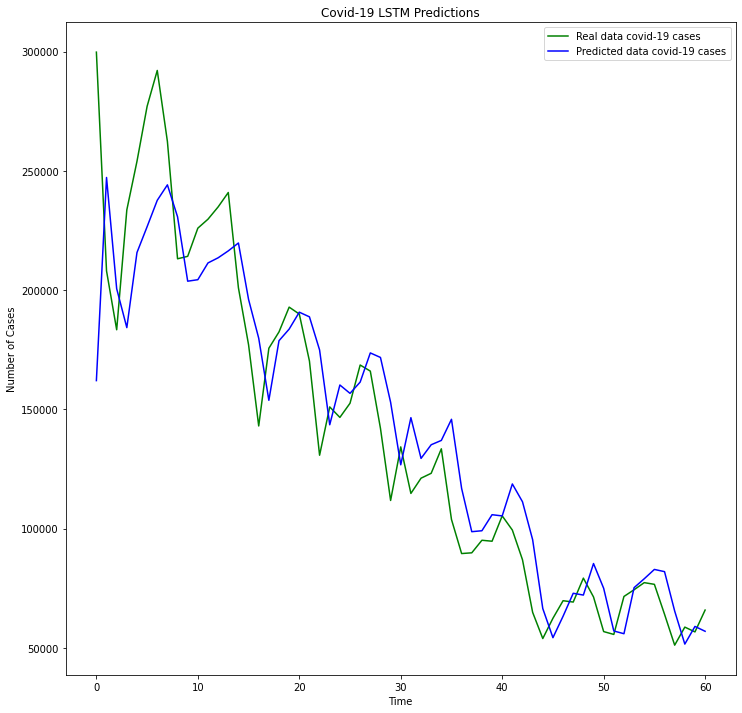

In [56]:
plt.figure(figsize=(12,12))
plt.plot(y_true, color = 'green', label='Real data covid-19 cases')
plt.plot(y_pred, color ='blue', label='Predicted data covid-19 cases')
plt.title('Covid-19 LSTM Predictions')
plt.xlabel('Time')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

After plotting the data, suprisingly it seems like the prediction is quite accurate but can be better. I think figure out a way to incorporate more variables or play around with parameters to see if you can decrease the rmse value. The lower the better. Each time step represents one day. The graph above is trained using data from 2020, and tested against 2021. Not entirely sure why the model has a rough time in the beginning of the year.